# Project: Analysis of dataset which contains insurance charges characterised by certain attributes

1.Attributes:- 
    
->age: age of primary beneficiary 
    
->sex: insurance contractor gender: female, male 
    
->bmi: Body mass index, providing an understanding of body,weights that are relatively high or low relative to height.

->children: Number of children covered by health insurance / Number of dependents 
    
->smoker: Smoking yes / No
    
->region: residential area in the US, northeast, southeast, southwest, northwest. 
    
->charges: Individual medical costs billed by health insurance 
    
    
2.The Project is presented as:

->Analysis of the Data

->Plots

->Hypothesis testing 

->Conclusion

In [246]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [247]:
#import dataset

df=pd.read_csv("insurance.csv")

# Analysis of the Data

In [248]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


the data set has 1338 rows  and 7 columns with the data types as above for each attribute

In [251]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


we get statistical data of the dataset such as mean,std deviation and 5 point values like min  25% 50% 75% max  by using describe function

->Missing data analysis

In [252]:
#any NaN values is found out in each column by invoking isnull()  funcion
# zero values in children is assumed to be as people with number of children eaualto 0 
# so it is not considered as missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there are no nan values in the dataset

# Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CE66CF198>,
      dtype=object)

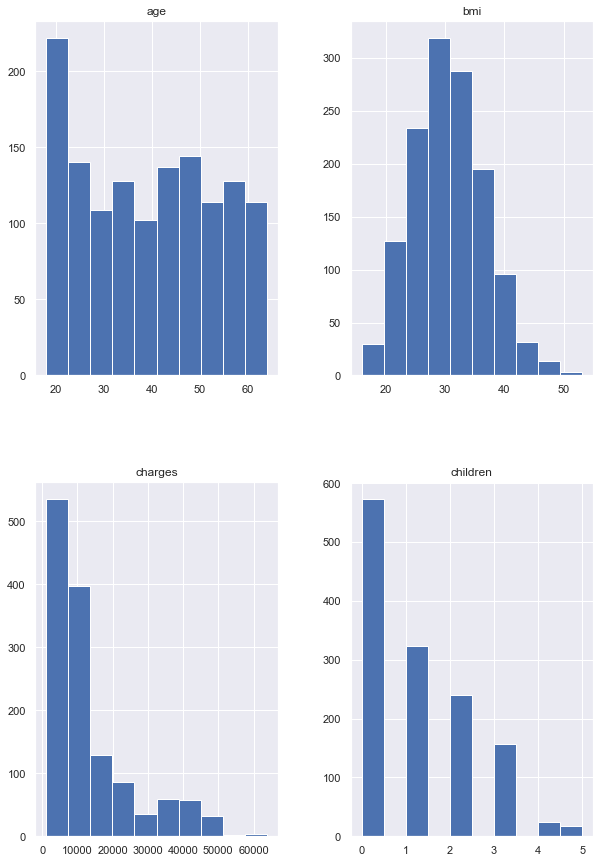

In [253]:
# 1. Histogram
df.hist(figsize=(10,15))

Analysis of the histogram

1.target variable: target variable Charges is right skiewed with charges 10000 units with most occurence in the dataset
    
2.children: children column is right skiewed with no of children 0 and 1 has most occurence in the dataset
    
3.bmi: bmi column has near normal plot
    
4.age: age group 20's has most occurence 

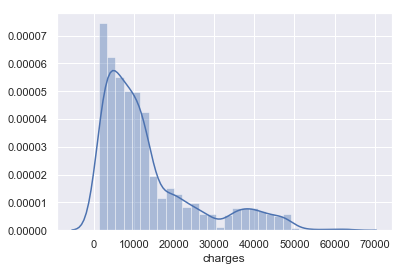

In [254]:
#2 Distplots
sns.distplot(df['charges'])

Entries in charges column is right skewed

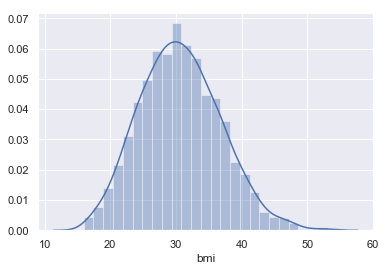

In [255]:
sns.distplot(df['bmi'])

Entries in bmi column is normally distributed

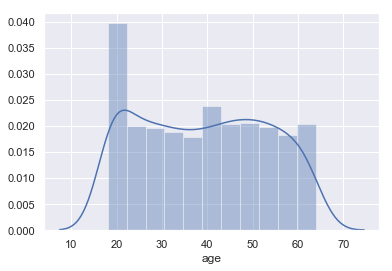

In [256]:
sns.distplot(df['age'])

Entries in age column has distribution nearly normal

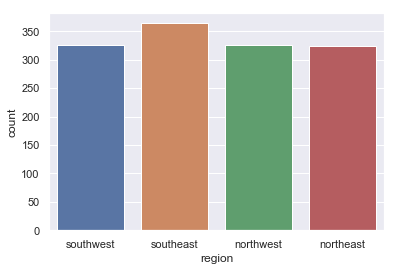

In [257]:
sns.countplot("region",data=df)

In [258]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

all the regions has almost near to equal distribution of entries in the dataset

In [259]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Number of male entries is nearly equal to Number of female entries

In [260]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

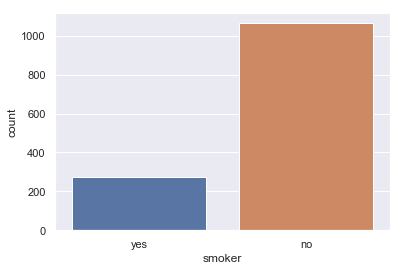

In [261]:
sns.countplot("smoker",data=df)

In [262]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Number of Non smokers are > No of smokers

# Outlier Analysis using Box Plot

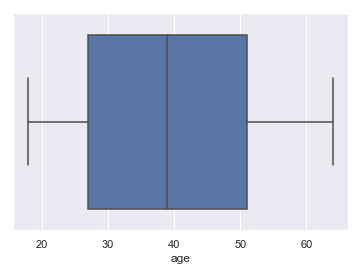

In [263]:
sns.boxplot(df['age'])

No outliers present in age column

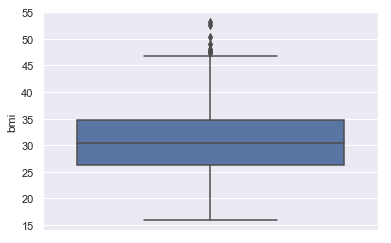

In [264]:
sns.boxplot(df['bmi'],orient='v')

there are some outlier values present above upper whisker end in bmi attribute

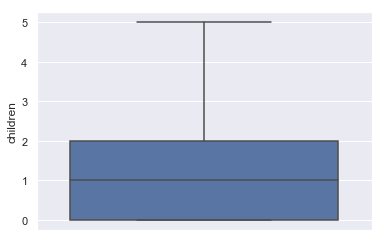

In [265]:
sns.boxplot(df['children'],orient='v')

there are no outliers present either on upper or lower whisker but the median is tending towards lower whisker end of the
box plot 

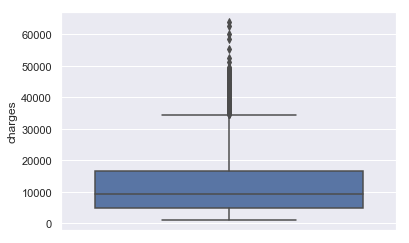

In [266]:
sns.boxplot(df['charges'],orient="v")

there are outliers present in upper whisker for the insurance charges ranging from 40000 to 60000 , with 60000
being the highest occuring insurance charge in the dataset

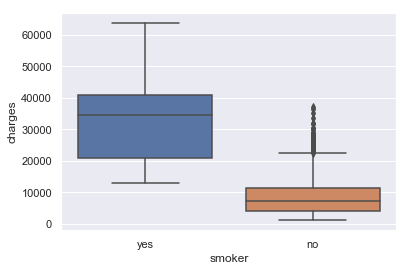

In [267]:
sns.boxplot(df['smoker'],df['charges'])

outliers are present upper whisker , among people who do not smoke with costs ranging from 
around 20000 to 40000 but the same insurance costs are not outliers for the people who smoke which is an interesting data point
also , the insurance charges range starts from 0 to 10000 among people who do not smoke while
the insurance charges range starts from 20000 to 40000 among people who smoke 

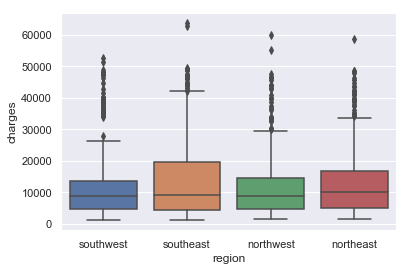

In [268]:
sns.boxplot(df['region'],df['charges'])

Outliers present in all the regions in the dataset Insurance charges in the upper 
whisker of the box plots highest being in southeast region and lowest being in southwest region

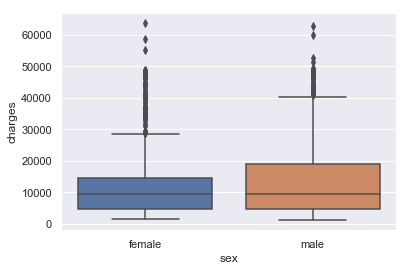

In [269]:
sns.boxplot(df['sex'],df['charges'])

outliers present in the upper whisker of the box plots highest in females,
First quartile (Q1) of insurance charges values in both males and females are almost same 
but Third quartile Q3 in males has insurance charges costing upto 20000

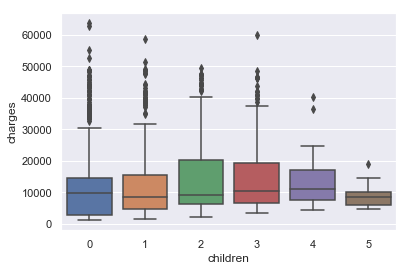

In [270]:
sns.boxplot(df['children'],df['charges'])

Outliers are more in number in upper whisker ,
for people with number  of children 0 and 1 which indicates higher insurence charges , 
the outlier count is less in people with no of children 4 and 5

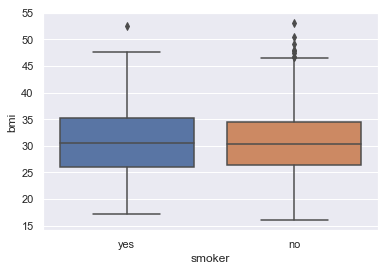

In [271]:
sns.boxplot(df['smoker'],df['bmi'])

Outlier are more in people who do not smoke compared to people who smoke indicating high BMI value 
in the category of people who do not smoke than category people who smoke.

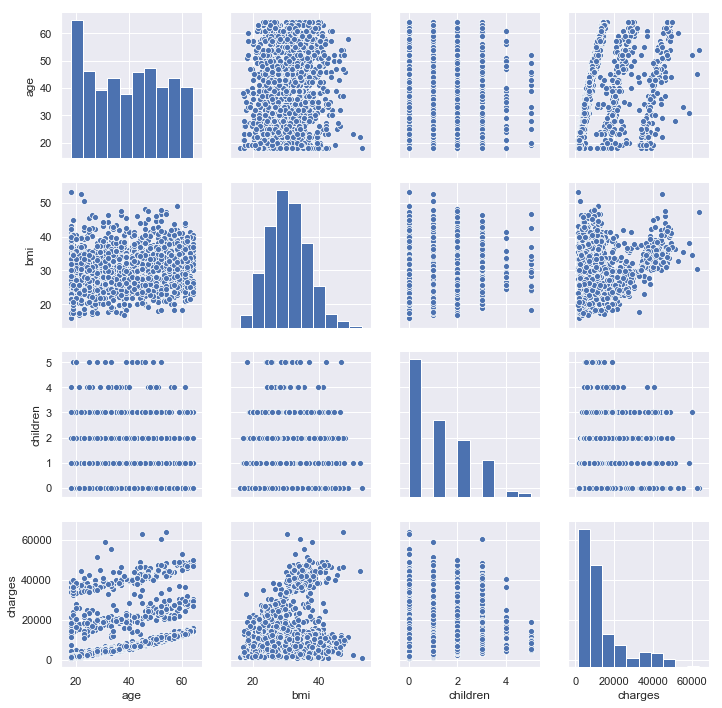

In [272]:
sns.pairplot(df[['age','sex','bmi', 'children', 'smoker','region','charges']])

Analysis of pairplot:
    1. insurance charges are linearly increasing with age
    2. insurance charges costs are spread with costs being low to high across range of lower and higher bmi 
    3. insurance charges costs are spread with costs being from low to high in people with number of children =0 to 5 , however higher costs are for people with chidren =0 to 3.
    4. Bmi values are spread across multiple age groups highest in lower age group
    5. All range of Bmi values are spread across people with no of children 0 to 5 highest in people with number of children from 0 to 3
    

In [273]:
corr =df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


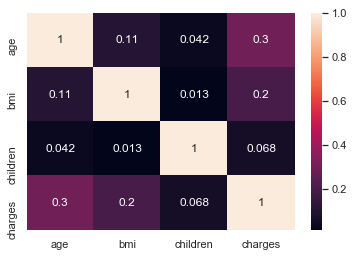

In [274]:
sns.heatmap(corr,annot=True)

age has highest correlation with insurance charges amoing other attributes 

In [275]:
#analysis of Smoker attribute On insurance charges when Age bmi children taken into consideraion

In [276]:
#we can learn about the linear relationship between two attributes by using  LMPLOT

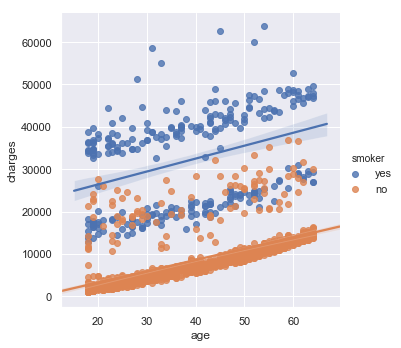

In [277]:
sns.lmplot(x="age",y="charges",hue="smoker", data=df)

Insurance Charges increases with age however when smoker is selected as yes , there is a shift in the cost of insurance indicating that smoker attribute has an impact of overall insurance charges

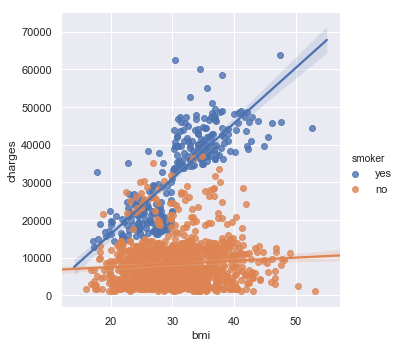

In [278]:
sns.lmplot(x="bmi", y="charges",hue="smoker", data=df)

Insurance charges is almost flat for range of BMI values for people with smoking as No ,
but cost of insurance gradually increases for same BMI values when people with smoking as yes

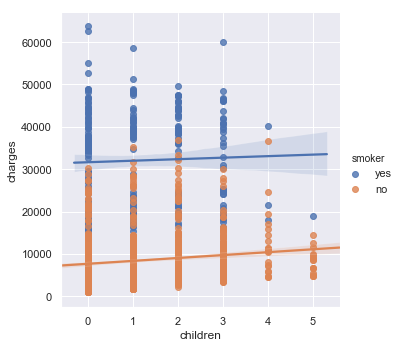

In [279]:
sns.lmplot(x="children", y="charges",hue="smoker", data=df)

Insurance charges for people with number of children=0 to 5
for people with smoking as no the charges are almost flat in the graph but for people with 
smoking as yes the charges are increased substantially

# Hypothesis Testing

->In the dataset , smoking attribute has people with smoking as no=1064 and smoking as yes= 274 
this number indicates that for smoking attribute the entries are imbalanced.

->since only this attribute which is independent is imbalanced and all other attributes are balanced with near
to equal number of entries

->oversampling and undersampling of  attribute "smoker" or any other technique of balancing the smoker attribute 
is not taken into account while HYPOTHESIS Testing 

In [280]:
#define libraries for Hypothesis testing

import numpy as np
from scipy.stats import ttest_1samp, ttest_ind,mannwhitneyu,levene,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
import pandas as pd

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [282]:
#the dataset DF is extracted to form  multiple datasets as below with specific conditions to be analysed for hypothesis testing

df1=df[df['smoker']=='yes']['charges']                  # dataset for insurance charges for people with smoking selected as Yes 
df2=df[df['smoker']=='no']['charges']                   # dataset for insurance charges for people with smoking selected as No
df3=df[df['sex']=='male']['bmi']                           #dataset for bmi for gender selected as Male
df4=df[df['sex']=='female']['bmi']                         #dataset for bmi for gender selected as Female
df5=df[df['smoker']=='yes']['sex']                         #dataset for smokers = Yes among male and Female
df6=df[df['smoker']=='no']['sex']                          #dataset for smokers = No among male and Female
df7=df[(df['sex']=='female') & (df['children']==0)]['bmi'] #dataset for bmi across women with childrem=0
df8=df[(df['sex']=='female') & (df['children']==1)]['bmi'] #dataset for bmi across women with childrem=1
df9=df[(df['sex']=='female') & (df['children']==2)]['bmi'] #dataset for bmi across women with childrem=2

As these datasets are extracted from the given CSV insurance , the number of entries remains the same even though specific columns are selected for analysis 
so for hypothesis testing,sample datasets with small number of entries are extracted  as sample datasets 

# case1: To test whether Insurance charges differ significantly for the People who smoke and for the people who do not smoke

In [283]:
df1.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [284]:
df2.describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

DF1 AND DF2 are charges datasets have 274 and 1064 entries respectively when smoking is considered yes and no.
so these datasets are considered as population
for sample datasets , the data is extracted from same DF1 AND DF2 using Indexing

In [285]:
#for indexing the data in DF1 is made as an array so that only sample data can be extracted 

# df1 and df2 are the datasets which extracts insurance charges for people who smoke and people who do not smoke respectively
# df1 and df2 are to be converted to array in order to index it for using it as sample datasets
# for hypothesis testing mean of sample datasets df10 and df11 are compared with mean of population df1 and df2.
df10=np.array([df1])
df11=np.array([df2])
charges_smokeyes=df10[0,0:50]
charges_smokeno=df11[0,0:50]

In [286]:
charges_smokeyes

array([16884.924  , 27808.7251 , 39611.7577 , 36837.467  , 37701.8768 ,
       38711.     , 35585.576  , 51194.55914, 39774.2763 , 48173.361  ,
       38709.176  , 23568.272  , 37742.5757 , 47496.49445, 34303.1672 ,
       23244.7902 , 14711.7438 , 17663.1442 , 16577.7795 , 37165.1638 ,
       39836.519  , 21098.55405, 43578.9394 , 30184.9367 , 47291.055  ,
       22412.6485 , 15820.699  , 30942.1918 , 17560.37975, 47055.5321 ,
       19107.7796 , 39556.4945 , 17081.08   , 32734.1863 , 18972.495  ,
       20745.9891 , 40720.55105, 19964.7463 , 21223.6758 , 15518.18025,
       36950.2567 , 21348.706  , 36149.4835 , 48824.45   , 43753.33705,
       37133.8982 , 20984.0936 , 34779.615  , 19515.5416 , 19444.2658 ])

In [287]:
charges_smokeno

array([ 1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ,  3756.6216 ,
        8240.5896 ,  7281.5056 ,  6406.4107 , 28923.13692,  2721.3208 ,
        1826.843  , 11090.7178 ,  1837.237  , 10797.3362 ,  2395.17155,
       10602.385  , 13228.84695,  4149.736  ,  1137.011  ,  6203.90175,
       14001.1338 , 14451.83515, 12268.63225,  2775.19215,  2198.18985,
        4687.797  , 13770.0979 ,  1625.43375, 15612.19335,  2302.3    ,
        3046.062  ,  4949.7587 ,  6272.4772 ,  6313.759  ,  6079.6715 ,
       20630.28351,  3393.35635,  3556.9223 , 12629.8967 ,  2211.13075,
        3579.8287 ,  8059.6791 , 13607.36875,  5989.52365,  8606.2174 ,
        4504.6624 , 30166.61817,  4133.64165,  1743.214  , 14235.072  ])

In [288]:
# we can test the normality of data sets df1 and df2 using shapiro test

In [289]:
shapiro(df1)

(0.9395521879196167, 3.6251879276250065e-09)

In [290]:
shapiro(df2)

(0.8728628158569336, 1.4455900162299346e-28)

In both cases , tests for normality using shapiro test the P value is less than 0.05 hence we reject the Null hypothesis that the data are normally distributed.
hence alternate hypothesis holds good which suggest that data in datasets df1 and df2 are not normally distributed 
hence when data is not normally distributed,so its regarded as non parametric

test subjects (charges_smokeyes and charges_smokeno) are not the same set of people
since we are testing on two sepearate group of people with smoking yes and smoking no so data is indepenent
MANNWHITNEY Method is used to compare the mean between groups charges_smokeyes,charges_smokeno as the data is
independent and non parametric

In [292]:
u, p_value = mannwhitneyu(charges_smokeyes,charges_smokeno)
print(u,p_value)

77.0 3.159532584849114e-16


from Mannwhitneyu test we observe that Pvalue is less than 0.05
so we reject the null hypothesis and embrace alternate hypotheisis
suggesting the mean value charges_smokeyes and charges_smokeno are not equal
hence Insurance charges occuring for people who smoke is not equal to insurance charges occuring for people who do not smoke

suppose if we assume the normality(parametric) for the independent datasets (charges_smokeyes,charges_smokeno)

In [293]:
t,p = ttest_ind(charges_smokeyes,charges_smokeno)
print(t,p)

12.441615485969848 6.974946694140853e-22


P value is again < 0.05 
so we reject the null hypothesis and embrace alternate hypotheisis suggesting the mean value charges_smokeyes
and charges_smokeno are not equal hence Insurance charges occuring for people who smoke is not equal to insurance 
charges occuring for people who do not smoke

# case 2: To test the hypothesis whether bmi of males differ significantly than females

In [294]:
df3.describe()

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

In [295]:
df4.describe()

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

DF3 AND DF4 BMI datasets which has 676 and 662 entries respectively so these datasets are considered as population 
for sample datasets , the data is extracted from same DF3 AND DF4 using Indexing

In [296]:
# df3 and df4 are two datasets which extracts BMI data for males and females
# these data in these datasets are converted into array

df12=np.array([df3])
df13=np.array([df4])
Male_BMI=df12[0,0:50]
Female_BMI=df13[0,0:50]

In [297]:
Male_BMI

array([33.77 , 33.   , 22.705, 28.88 , 29.83 , 26.22 , 34.4  , 42.13 ,
       24.6  , 23.845, 40.3  , 35.3  , 34.1  , 28.025, 17.385, 36.3  ,
       35.6  , 28.31 , 36.4  , 20.425, 20.8  , 36.67 , 39.9  , 21.78 ,
       37.05 , 37.3  , 35.2  , 28.   , 34.43 , 36.955, 31.68 , 27.36 ,
       33.66 , 24.7  , 26.315, 23.98 , 28.5  , 32.01 , 27.4  , 34.01 ,
       35.53 , 26.885, 37.62 , 22.895, 29.83 , 34.77 , 38.28 , 19.95 ,
       19.3  , 25.46 ])

In [298]:
Female_BMI

array([27.9  , 25.74 , 33.44 , 27.74 , 25.84 , 26.29 , 39.82 , 30.78 ,
       36.005, 32.4  , 31.92 , 27.72 , 23.085, 32.775, 26.315, 28.6  ,
       32.965, 26.6  , 36.63 , 30.8  , 38.665, 34.77 , 24.53 , 35.625,
       33.63 , 28.69 , 31.825, 22.88 , 37.335, 25.935, 22.42 , 28.9  ,
       39.1  , 36.19 , 24.75 , 28.1  , 29.59 , 39.805, 32.965, 38.285,
       41.23 , 34.8  , 31.16 , 27.2  , 27.74 , 26.98 , 39.49 , 24.795,
       31.3  , 37.62 ])

In [299]:
# we can test the normality of data sets df3 and df4 using shapiro test

In [300]:
shapiro(df3)

(0.9930475354194641, 0.003130641533061862)

In [301]:
shapiro(df4)

(0.9930257797241211, 0.0035433683078736067)

in both cases , tests for normality using shapiro test the P value is less than 0.05 hence we reject the Null hypothesis 
hence alternate hypothesis holds good which suggest that data in datasets df3 and df4 are not normally distributed 
hence when data is not normally distributed , so its regarded as non parametric

test subjects (Male and Females) are not the same set of people no so data is indepenent
hence MANNWHITNEY Method is used to compare the mean between groups Males and Female as the data is independent and non parametric

In [302]:
u, p_value = mannwhitneyu(Male_BMI,Female_BMI)
print(u,p_value)

1183.5 0.32455451054083184


From Mannwhitneyu test we observe that Pvalue is more than 0.05 so we accept the null hypothesis 
which suggests that the mean value of Male BMI and Female BMI are considerably equal hence Male BMI and
Female BMI doesnt differ significantly 

suppose if we assume the normality(parametric) for the independent datasets ( Male_BMI, Female_BMI)

In [303]:
t,p = ttest_ind(Male_BMI,Female_BMI)
print(t,p)

-0.6924950987379745 0.4902641419520223


P value is again > 0.05 hence null hypothesis is accepted which suggests that the mean value of Male BMI and Female BMI are considerably 
equal hence Male BMI and Female BMI doesnt differ significantly

# case 3: To test the proportion of smokers differ significantly in different genders

DF5 is the dataset of smokers among male and female gender
DF6 is the dataset of Non smokers among male and female gender
Chi -Square test is used to test the proportion of smokers if it differs significantly in both males and females

In [304]:
from scipy.stats import chisquare,chi2_contingency

In [305]:
cont= pd.crosstab(df['smoker'],df['sex'] )

In [306]:
cont

sex,female,male
smoker,,
no,547,517
yes,115,159


In [307]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

hence cont table has rows equal to number of entries in the dataset 

smoker=no-> 547+517=1064

smoker=yes->115+159=274

we can proceed with chi square test

In [308]:
chisquare(df5.value_counts())

Power_divergenceResult(statistic=7.065693430656935, pvalue=0.007857389588994759)

p value is less than 0.05 hence null hypothesis is rejected and alternate is accepted which says
proportion of smokers differ significantly among males and females 

In [309]:
chisquare(df6.value_counts())

Power_divergenceResult(statistic=0.8458646616541353, pvalue=0.3577248433883444)

p value is more than 0.05 hence null hypothesis is accepted which says proportion of non smokers does not differ 
significantly among male and female gender.

In [310]:
chi2_contingency(cont)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

p value is less than 0.05 hence null hypothesis is rejected 
and accept alternate hypothesis which says that these two attributes are dependent with degree of freedom 1

# case 4: Distribution of BMI across women with no children, 1 child , 2 children

In [311]:
#DF7 is the dataset for BMI Across women with zero children
#DF8 is the dataset for BMI Across women with one children
#DF9 is the dataset for BMI Across women with two children

#since there are three data sets to be compared , ANOVA method is used instead of t test.

In [312]:
#import library
import scipy.stats as stats

In [313]:
levene(df7,df8,df9)

LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)

Levene’s test for homogeneity of variance has P value greater than 0.05  which indicates that the groups have equal variances

In [314]:
# analysis of the three groups from the Anova ONE WAY function stats.f_oneway
stats.f_oneway(df7,df8,df9)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

p value is greater than 0.05 , null hypothesis is accepted which says there is no significant difference of mean 
value between bmi datasets df7,df8,df9
hence there is no significant difference of BMI across women with no children , one child and two children

# Conclusion:

EDA: 
    
    -> there are no missing values in the dataset
    
    -> there are outliers in some attributes 
    
    -> People with smoking=yes significantly changes the insurance costs than for people with smoking=no
        

Hypothesis Testing:
    
    ->Insurance charges occuring for people who smoke is not equal to insurance charges occuring for people who do not smoke
    
    ->Male BMI and Female BMI doesnt differ significantly
    
    ->proportion of smokers differ significantly among males and females
    
    ->there is no significant difference of BMI across women with no children , one child and two children